# **Part 2: Feedforward network Case study – Multi-layer Perceptron model for predicting heat influx into a home**

## 1. Explore data

First few rows of the dataset:
   HeatFlux  Insulation   East  South  North
0     271.8      783.35  33.53  40.55  16.66
1     264.0      748.45  36.50  36.19  16.46
2     238.8      684.45  34.66  37.31  17.66
3     230.7      827.80  33.13  32.52  17.50
4     251.6      860.45  35.75  33.71  16.40

Basic statistics of the dataset:
         HeatFlux  Insulation        East       South       North
count  319.000000  319.000000  319.000000  319.000000  319.000000
mean   249.637931  754.474138   35.096552   35.529310   16.702069
std     22.535870   78.532135    1.394537    1.823607    0.893789
min    181.500000  568.550000   31.080000   31.840000   15.540000
25%    238.800000  704.050000   34.460000   34.140000   16.040000
50%    257.900000  756.000000   35.350000   35.890000   16.450000
75%    265.800000  801.650000   35.770000   36.500000   17.370000
max    278.700000  909.450000   37.820000   40.550000   19.050000


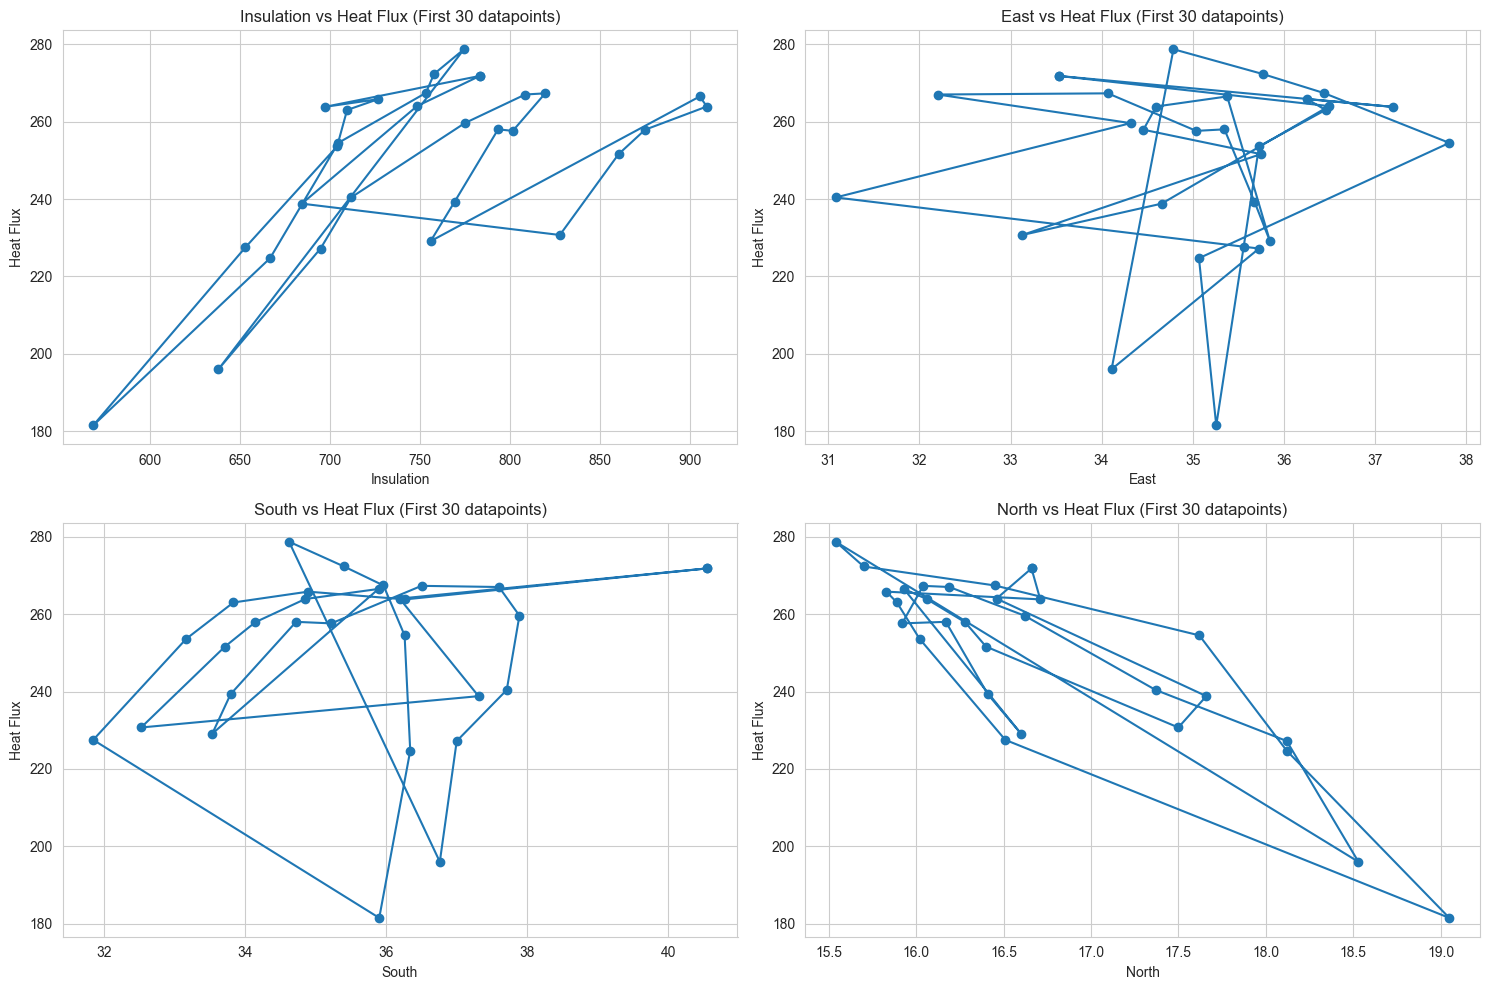

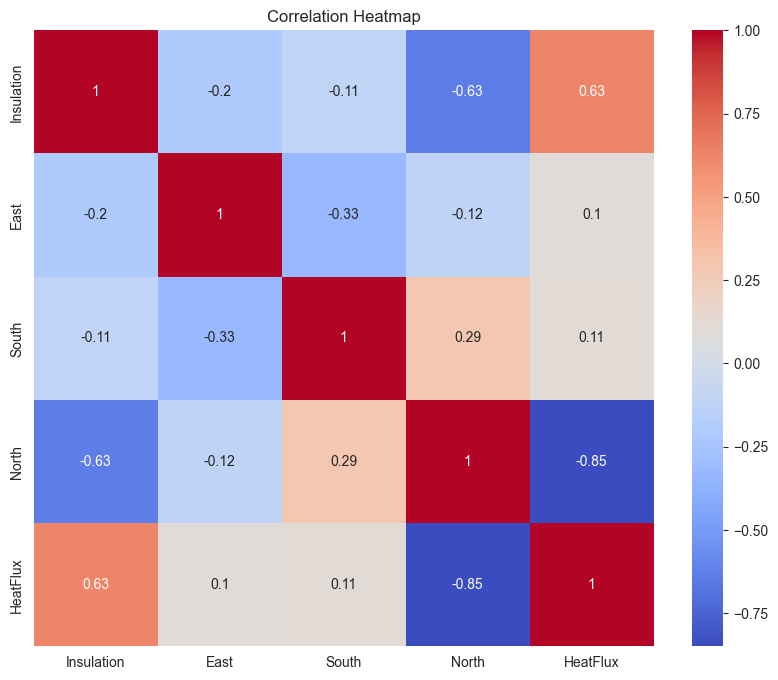

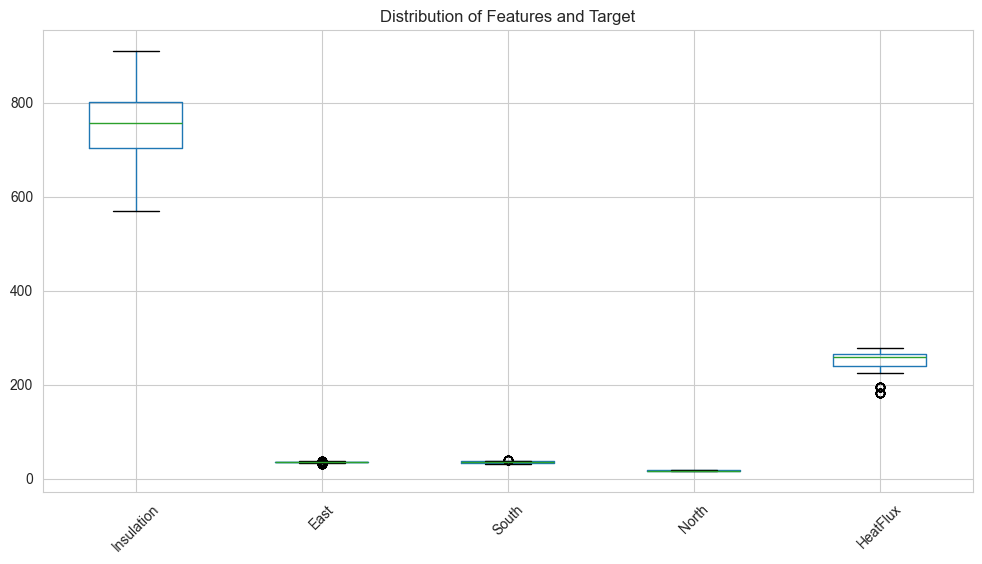


Correlation coefficients with Heat Flux:
Insulation: 0.6276
East: 0.1024
South: 0.1121
North: -0.8488

Most influential features:
North: negative correlation (-0.8488)
Insulation: positive correlation (0.6276)


In [1]:
# Data Exploration Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Step 1: Load the data
file_path = 'Heat_Influx_insulation_east_south_north.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic statistics
print("First few rows of the dataset:")
print(data.head())
print("\nBasic statistics of the dataset:")
print(data.describe())

# Define features and target
features = ['Insulation', 'East', 'South', 'North']
target = 'HeatFlux'

# Normalize the data
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(
    scaler.fit_transform(data[features + [target]]),
    columns=features + [target]
)

# 1. Plotting relationships between inputs and target using first 30 datapoints
plt.figure(figsize=(15, 10))
first_30 = data.iloc[:30]
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.plot(first_30[feature], first_30[target], 'o-')
    plt.xlabel(feature)
    plt.ylabel('Heat Flux')
    plt.title(f'{feature} vs Heat Flux (First 30 datapoints)')
plt.tight_layout()
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Box plots for feature distributions
plt.figure(figsize=(12, 6))
data.boxplot(column=features + [target])
plt.title('Distribution of Features and Target')
plt.xticks(rotation=45)
plt.show()

# 4. Print correlation coefficients with target
correlations = data[features].corrwith(data[target])
print("\nCorrelation coefficients with Heat Flux:")
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.4f}")

# Determine most influential features
abs_correlations = correlations.abs()
most_influential = abs_correlations.nlargest(2)
print("\nMost influential features:")
for feature, corr in most_influential.items():
    relationship = "positive" if correlations[feature] > 0 else "negative"
    print(f"{feature}: {relationship} correlation ({correlations[feature]:.4f})")

### The observations and comments on the relationship between inputs and the target (HeatFlux):

1. **Insulation vs HeatFlux**:
   There appears to be a strong positive correlation between insulation and heat flux. As insulation increases, the heat flux generally increases as well. This relationship is not perfectly linear, but the trend is clear and consistent across the dataset. The correlation coefficient of 0.6276 supports this observation.

2. **East vs HeatFlux**:
   The relationship between the East orientation and heat flux is less clear. There seems to be a weak positive correlation, but it's not as pronounced as with insulation. The scattered plot shows no strong pattern, and the correlation coefficient of 0.1024 confirms this weak positive relationship.

3. **South vs HeatFlux**:
   Similar to the East orientation, the South orientation shows a weak positive correlation with heat flux. The plot displays a scattered pattern with no clear trend. The correlation coefficient of 0.1121 supports this observation of a weak positive relationship.

4. **North vs HeatFlux**:
   The North orientation demonstrates a strong negative correlation with heat flux. As the North orientation increases, the heat flux tends to decrease significantly. This relationship is the most pronounced among all inputs, showing a clear downward trend in the plot. The correlation coefficient of -0.8488 strongly supports this observation.